In [196]:
import numpy as np

### Lista zawierająca punkty pomiarowe stanowiące podstawę obliczeń

In [197]:
pts = np.array([[1,3], [2,1], [3, -1], [4, 2]])
pts = np.transpose(pts)
pts

array([[ 1,  2,  3,  4],
       [ 3,  1, -1,  2]])

### Punkt w którym będziemy szukać wartości wielomianu interpolacyjnego

In [198]:
x = 10

### Przypisanie wartości z listy do zmiennych w celu łatwiejszego ich wykorzystania

In [199]:
xj = pts[0]
yj = pts[1]
print('i  = ', np.arange(len(xj)))
print ('Xj = ', xj)
print ('Yj = ', yj)

i  =  [0 1 2 3]
Xj =  [1 2 3 4]
Yj =  [ 3  1 -1  2]


### Obliczanie liczników wszysktich wielomianów i zapisanie ich do tablicy o nazwie tops

In [200]:
tops = np.array([])
for xindex, xx in enumerate(xj):
    # Create a boolean mask to select all elements except for the one at the specified index
    mask = np.arange(len(xj)) != xindex
    # Use the boolean mask to select the elements we want
    elements_except_current = xj[mask]
    top = np.prod(x - elements_except_current)
    tops = np.append(tops, top)

print(tops)

[336. 378. 432. 504.]


### Obliczanie mianowników wszystkich wielomianów i zapisanie ich do tablicy o nazwie bottoms

In [201]:
bottoms = np.array([])
for xindex, xx in enumerate(xj):
   x_other_than_curr = xj[np.arange(len(xj)) != xindex]
   bottom = np.prod(xx - xj[np.arange(len(xj)) != xindex])
   bottoms = np.append(bottoms, bottom)
print(bottoms)

[-6.  2. -2.  6.]


In [202]:
print('tops', tops)
print('bottoms', bottoms)
division = np.divide(tops, bottoms)
poszczegolne_skladniki = (yj*division)
print('poszczegolne_skladniki', poszczegolne_skladniki)
print('suma', np.sum(poszczegolne_skladniki))

tops [336. 378. 432. 504.]
bottoms [-6.  2. -2.  6.]
poszczegolne_skladniki [-168.  189.  216.  168.]
suma 405.0


### Wyświetlenie wartości wielomianu interpolacyjnego w punkcie x

In [203]:
print('Wartość wielomianu interpolacyjnego w punkcie x = ', x, ' wynosi: ', np.sum(poszczegolne_skladniki))

Wartość wielomianu interpolacyjnego w punkcie x =  10  wynosi:  405.0


In [204]:
from sympy import symbols, simplify

In [205]:
x = symbols('x')

In [206]:
tops = np.array([])
for xindex, xx in enumerate(xj):
    # Create a boolean mask to select all elements except for the one at the specified index
    mask = np.arange(len(xj)) != xindex
    # Use the boolean mask to select the elements we want
    elements_except_current = xj[mask]
    top = np.prod(x - elements_except_current)
    tops = np.append(tops, top)

print(tops)
print(simplify(tops))

[(x - 4)*(x - 3)*(x - 2) (x - 4)*(x - 3)*(x - 1) (x - 4)*(x - 2)*(x - 1)
 (x - 3)*(x - 2)*(x - 1)]
[(x - 4)*(x - 3)*(x - 2), (x - 4)*(x - 3)*(x - 1), (x - 4)*(x - 2)*(x - 1), (x - 3)*(x - 2)*(x - 1)]


In [207]:
print('tops', tops)
print('bottoms', bottoms)
division = np.divide(tops, bottoms)
poszczegolne_skladniki = (yj*division)
print('poszczegolne_skladniki', poszczegolne_skladniki)
print('suma', np.sum(poszczegolne_skladniki))
print(simplify(np.sum(poszczegolne_skladniki)))

tops [(x - 4)*(x - 3)*(x - 2) (x - 4)*(x - 3)*(x - 1) (x - 4)*(x - 2)*(x - 1)
 (x - 3)*(x - 2)*(x - 1)]
bottoms [-6.  2. -2.  6.]
poszczegolne_skladniki [-0.5*(x - 4)*(x - 3)*(x - 2) 0.5*(x - 4)*(x - 3)*(x - 1)
 0.5*(x - 4)*(x - 2)*(x - 1) 0.333333333333333*(x - 3)*(x - 2)*(x - 1)]
suma -0.5*(x - 4)*(x - 3)*(x - 2) + 0.5*(x - 4)*(x - 3)*(x - 1) + 0.5*(x - 4)*(x - 2)*(x - 1) + 0.333333333333333*(x - 3)*(x - 2)*(x - 1)
x*(0.833333333333333*x**2 - 5.0*x + 7.16666666666667)


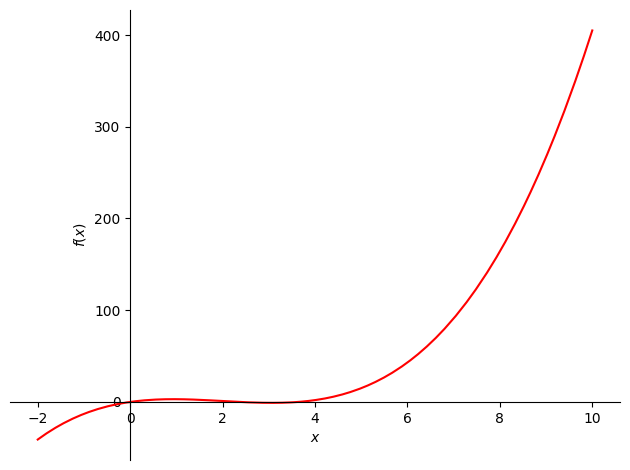

In [208]:
from sympy.plotting import plot

p1 = plot(np.sum(poszczegolne_skladniki), (x, -2, 10), show=False, line_color='red')

p1.show()